In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=2/vary_r_nomarg_noisesd_2.0_n_200_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,0.1,0.2,0.3,full,UV(0.1)
0,0.666667,1.000000,0.666667,0.833333,0.857143
1,0.833333,0.666667,0.800000,0.800000,1.000000
2,0.833333,0.833333,1.000000,0.833333,0.666667
3,1.000000,1.000000,0.833333,0.833333,1.000000
4,1.000000,1.000000,0.666667,0.666667,0.166667
...,...,...,...,...,...
39,0.857143,0.833333,0.666667,0.666667,0.857143
40,1.000000,1.000000,0.857143,1.000000,1.000000
41,0.857143,1.000000,0.857143,1.000000,1.000000
42,0.666667,0.833333,0.333333,0.333333,1.000000


In [5]:
length_df

,0.1,0.2,0.3,full,UV(0.1)
0,7.434520,9.417635,9.466715,6.479082,21.821449
1,8.996171,9.646802,9.229698,6.528723,21.821449
2,9.061263,9.626392,11.129018,6.722149,21.821449
3,7.769106,9.586792,10.665538,6.657756,21.821449
4,9.509623,9.886720,9.955081,6.617483,21.821449
...,...,...,...,...,...
39,7.582999,9.802273,10.450787,6.507300,21.821449
40,9.747359,9.021454,8.672873,6.368278,21.821449
41,8.631004,10.052161,9.739382,6.553592,21.821449
42,9.710779,10.261358,10.391107,6.743825,21.821449


In [6]:
MSE_df

,0.1,0.2,0.3,full,UV(0.1)
0,5.341335,4.894927,5.321379,5.321379,4.661906
1,4.517711,4.195855,4.969250,4.969250,4.377046
2,4.794981,4.597818,4.955181,4.955181,5.256011
3,5.682467,5.575749,5.151579,5.151579,5.327806
4,5.214592,5.090848,5.286123,5.286123,5.184960
...,...,...,...,...,...
39,5.500995,5.116025,5.078799,5.078799,4.605607
40,4.302183,4.592879,3.832333,3.832333,4.462715
41,5.369932,5.444375,4.712550,4.712550,5.397559
42,6.026211,5.586917,6.183697,6.183697,6.653534


In [7]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.864208
0.2        0.907577
0.3        0.788707
full       0.809991
UV(0.1)    0.896840
dtype: float64
Length :
 0.1         9.039109
0.2         9.494826
0.3         9.726463
full        6.559650
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.877843
0.2        4.873714
0.3        4.882332
full       4.882332
UV(0.1)    4.810235
dtype: float64


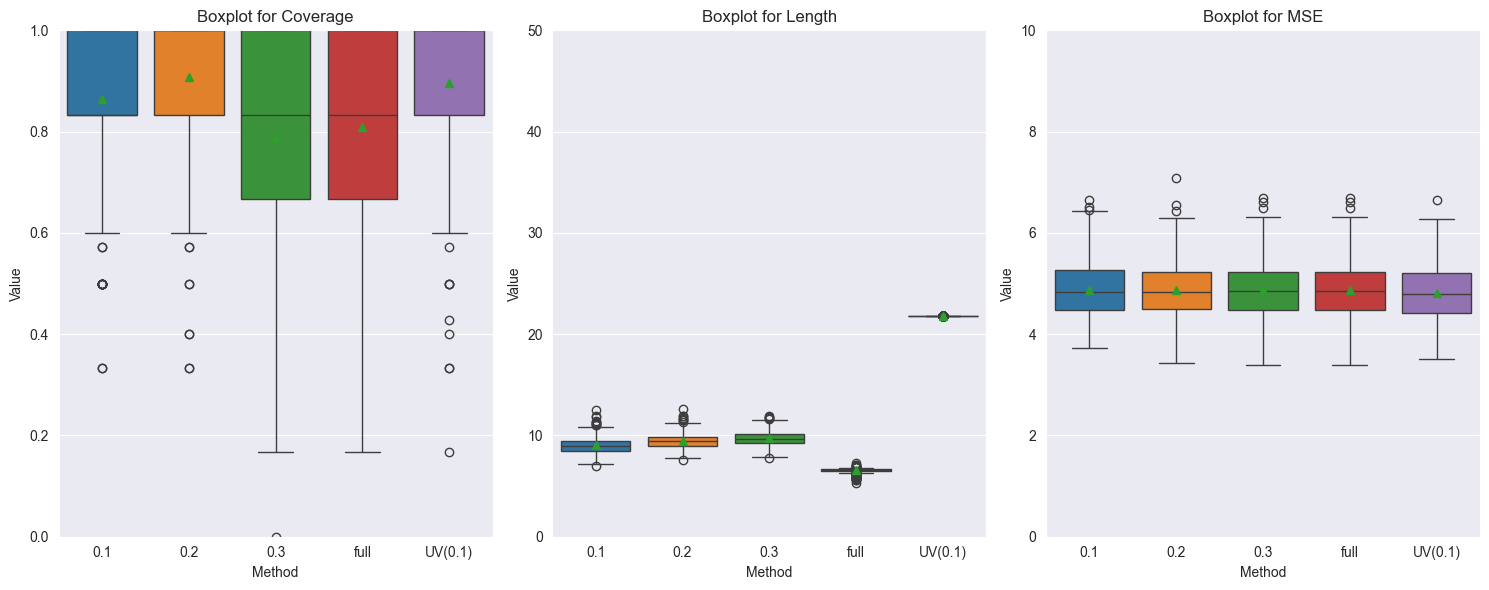

In [8]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 0.1        0.835317
0.2        0.964881
0.3        0.795635
0.4        0.666865
0.5        0.617262
full       0.765873
UV(0.1)    0.932540
dtype: float64
Length :
 0.1        12.906963
0.2        13.674200
0.3        13.932753
0.4        13.537359
0.5        13.334720
full        6.777640
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.794437
0.2        4.825551
0.3        4.924132
0.4        4.808432
0.5        4.789856
full       4.789856
UV(0.1)    4.734692
dtype: float64


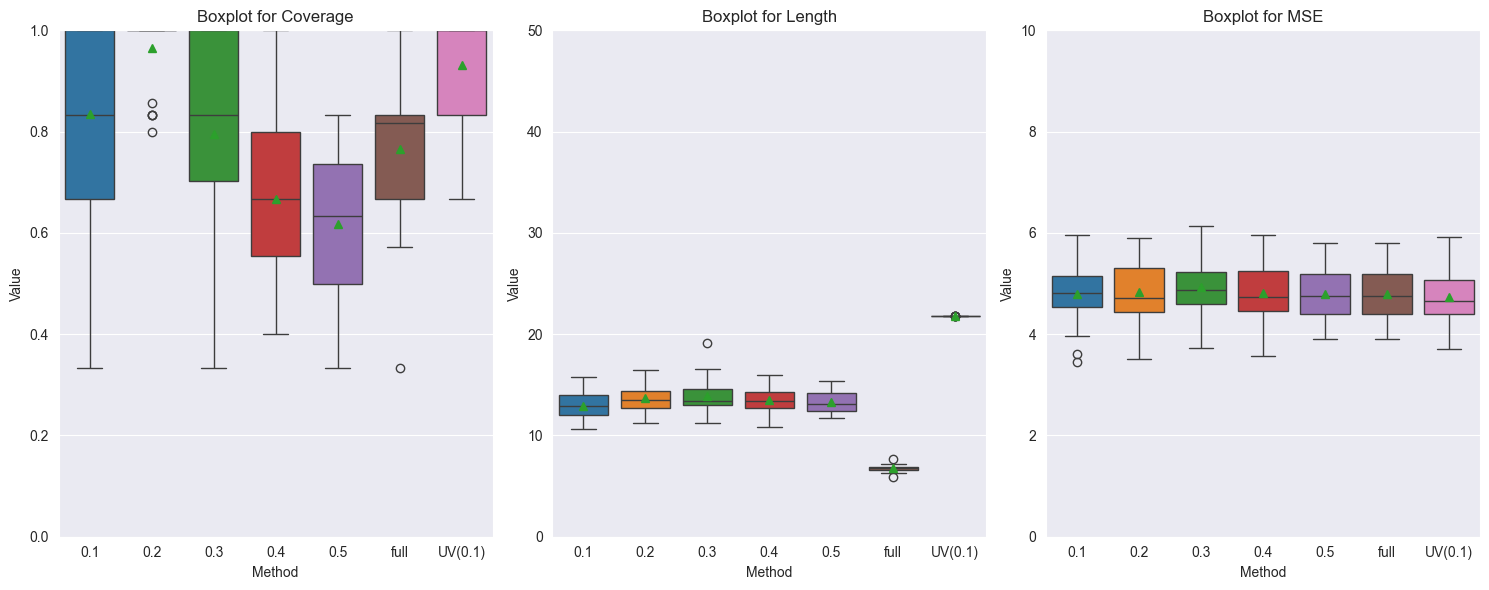

In [19]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [682]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,full,UV(0.1)
0,0.857143,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.75
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.571429,0.857143,1.00
2,1.000000,0.666667,1.000000,0.571429,0.714286,0.833333,0.833333,0.666667,0.833333,1.00
3,1.000000,1.000000,1.000000,0.571429,1.000000,0.571429,1.000000,0.833333,0.833333,0.75
4,0.800000,1.000000,0.200000,0.600000,1.000000,0.166667,1.000000,1.000000,0.800000,1.00
...,...,...,...,...,...,...,...,...,...,...
21,1.000000,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.50
22,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,0.666667,0.166667,0.333333,0.50
23,1.000000,0.833333,1.000000,0.833333,0.500000,1.000000,0.833333,1.000000,1.000000,0.50
24,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [36]:
a.min(axis=1) > -1

5

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)

True